In [2]:
from google.colab import files
uploaded = files.upload()

Saving FA-KES-Dataset.csv to FA-KES-Dataset.csv


In [4]:
import pandas as pd
print (uploaded['FA-KES-Dataset.csv'][:200].decode('utf-8') + '...')



unit_id,article_title,article_content,source,date,location,labels
1914947530,Syria attack symptoms consistent with nerve agent use WHO,"Wed 05 Apr 2017 Syria attack symptoms consistent with nerve age...


In [5]:
import pandas as pd

import matplotlib.pyplot as plt
df=pd.read_csv('FA-KES-Dataset.csv',encoding='latin1')
df

,unit_id,article_title,article_content,source,date,location,labels
0,1.914948e+09,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1.914948e+09,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1.914948e+09,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,NaN,aleppo,0
3,1.914948e+09,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,NaN,aleppo,0
4,1.914948e+09,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0
...,...,...,...,...,...,...,...
799,1.965511e+09,Turkish Bombardment Kills 20 Civilians in Syria,28-08-2016 Turkish Bombardment Kills 20 Civili...,manar,8/28/2016,aleppo,1
800,1.965511e+09,Martyrs as Terrorists Shell Aleppos Salah Eddin,17-08-2016 Martyrs as Terrorists Shell Aleppos...,manar,8/1/2016,aleppo,1
801,1.965511e+09,Chemical Attack Kills Five Syrians in Aleppo SANA,03-08-2016 Chemical Attack Kills Five Syrians ...,manar,8/3/2016,aleppo,0
802,1.965511e+09,5 Killed as Russian Military Chopper Shot down...,01-08-2016 5 Killed as Russian Military Choppe...,manar,8/1/2016,idlib,1


In [ ]:
dataset = df.values
Y = dataset[:,15]
X = dataset[:,0:14]

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(216, 14) (46, 14) (47, 14) (216,) (46,) (47,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import seaborn as sns
model = Sequential([
    Dense(32, activation='sigmoid', input_shape=(14,)),
    Dense(32, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history =model.fit(X_train, Y_train, epochs=5)

model.evaluate(X_test, Y_test)[1]

Epoch 1/5
7/7 [==============================] - 1s 3ms/step - loss: 0.9875 - accuracy: 0.1296
Epoch 2/5
7/7 [==============================] - 0s 4ms/step - loss: 0.8213 - accuracy: 0.1296
Epoch 3/5
7/7 [==============================] - 0s 4ms/step - loss: 0.7028 - accuracy: 0.4259
Epoch 4/5
7/7 [==============================] - 0s 3ms/step - loss: 0.6195 - accuracy: 0.8704
Epoch 5/5
2/2 [==============================] - 0s 5ms/step - loss: 0.5334 - accuracy: 0.8723


0.8723404407501221

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


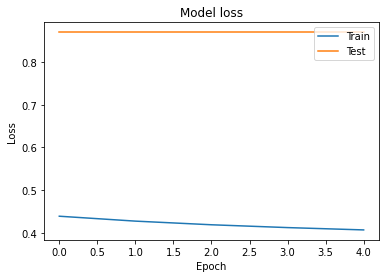

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])


plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import seaborn as sns
model = Sequential([
    Dense(32, activation='tanh', input_shape=(14,)),
    Dense(32, activation='tanh'),
    Dense(1, activation='tanh'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5)
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/5
7/7 [==============================] - 1s 3ms/step - loss: 1.4516 - accuracy: 0.7269
Epoch 2/5
7/7 [==============================] - 0s 3ms/step - loss: 0.3777 - accuracy: 0.8704
Epoch 3/5
7/7 [==============================] - 0s 3ms/step - loss: 0.3553 - accuracy: 0.8657
Epoch 4/5
7/7 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 0.8796
Epoch 5/5
7/7 [==============================] - 0s 3ms/step - loss: 0.3339 - accuracy: 0.8796
Epoch 1/100
7/7 [==============================] - 0s 37ms/step - loss: 0.3250 - accuracy: 0.8796 - val_loss: 0.2724 - val_accuracy: 0.8913
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.3177 - accuracy: 0.8796 - val_loss: 0.2687 - val_accuracy: 0.8913
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.3098 - accuracy: 0.8796 - val_loss: 0.2654 - val_accuracy: 0.8913
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.3049 - accuracy: 0.8796 - val_loss

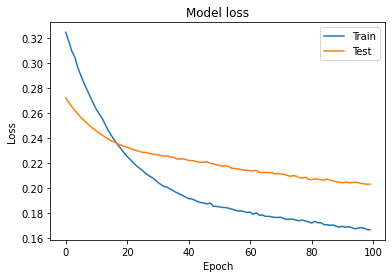

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import seaborn as sns
model = Sequential([
    Dense(32, activation='relu', input_shape=(14,)),
    Dense(32, activation='relu'),
    Dense(1, activation='relu'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5)
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/5
7/7 [==============================] - 1s 3ms/step - loss: 3.9272 - accuracy: 0.5833
Epoch 2/5
7/7 [==============================] - 0s 3ms/step - loss: 0.2779 - accuracy: 0.9120
Epoch 3/5
7/7 [==============================] - 0s 3ms/step - loss: 0.2573 - accuracy: 0.9028
Epoch 4/5
7/7 [==============================] - 0s 3ms/step - loss: 0.2497 - accuracy: 0.9074
Epoch 5/5
7/7 [==============================] - 0s 4ms/step - loss: 0.2429 - accuracy: 0.8981
Epoch 1/100
7/7 [==============================] - 0s 41ms/step - loss: 0.2385 - accuracy: 0.9074 - val_loss: 0.4731 - val_accuracy: 0.8696
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.2355 - accuracy: 0.9028 - val_loss: 0.2368 - val_accuracy: 0.8696
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 0.2301 - accuracy: 0.9167 - val_loss: 0.2079 - val_accuracy: 0.8913
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2280 - accuracy: 0.9120 - val_los

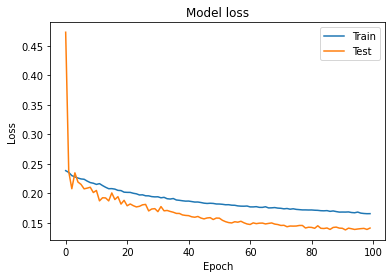

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()